# Identifier

Steps:
- Collect data [DONE]
    - Find data on UCI ML Repository, Kaggle, Google
    - Web scraping images
- Clean data [DONE]
    - Arrange data into csv file
        - Labelling:
            - Label 0 (thumbs down)
            - Label 1 (thumbs up)
        - Inputting images:
            - Read/Reshape images
            - Put into csv
- Train model

# Import Packages

In [539]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow.keras import datasets

# Import Dataset

In [541]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [567]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [485]:
def resize_images(initial_folder, new_folder):
    for filename in os.listdir('./' + initial_folder):
        img = cv2.imread('./' + initial_folder + '/' + filename)
    
        # Define the new dimensions 
        new_width = 32 
        new_height = 32 
         
        # Resize the image using INTER_CUBIC interpolation 
        resized_image = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC) 
         
        # Save the resized image 
        cv2.imwrite('./' + new_folder + '/' + filename, resized_image) 

In [487]:
# CREATES ADDITIONAL FILES
# ONLY RUN ONE TIME
# ***** resize_images('images', 'resized_images') *******

In [489]:
# Optionally, display the image using OpenCV 
'''cv2.imshow('Resized Image', resized_image) 
cv2.waitKey(0) 
cv2.destroyAllWindows()'''


"cv2.imshow('Resized Image', resized_image) \ncv2.waitKey(0) \ncv2.destroyAllWindows()"

In [491]:
def show_imgs(folder, n_imgs):
    for filename in os.listdir('./' + folder)[:n_imgs]:
        img = cv2.imread('./' + folder + '/' + filename)
        plt.imshow(img, cmap='gray')
        plt.show()

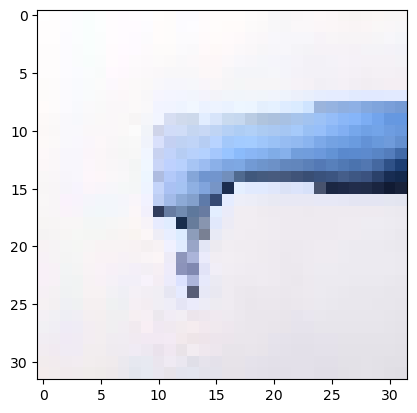

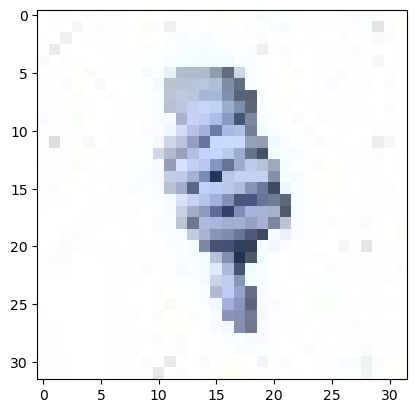

In [493]:
#show_imgs('resized_images', 2)

In [495]:
def import_data(folder):
    training_data = []
    for filename in os.listdir('./' + folder):
        img = cv2.imread('./' + folder + '/' + filename)
        label = 1
        if 'down' in filename:
            label = 0
        training_data.append([img, label])
    return training_data

In [497]:
#training_data = import_data('resized_images')

In [499]:
import random

def create_dataset(training_data):
    X = []
    y = []
    '''
    df = pd.DataFrame({
        'features': [],
        'labels': []
    })
    '''
    random.shuffle(training_data)
    for features, label in training_data:
        X.append(features)
        y.append(label)
    X = np.array(X).reshape(-1, 32, 32, 3)

    '''
    new_row = {
        'features': X,
        'labels': y
    }
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    '''
    
    return X, y

In [501]:
#X, y = create_dataset(training_data)

# Split Dataset

In [569]:
def split_dataset(df):
    train, test = np.split(df, [int(0.8*len(df))])
    return train, test

In [ ]:
#X_train, X_test = split_dataset(X)
#y_train, y_test = split_dataset(y)

In [506]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

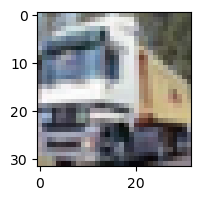

In [551]:
plot_sample(X_train, y_train, 1)

# Normalize training data

In [571]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Simple ANN Model (Artificial Neural Network)

In [573]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report

In [596]:
ann = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(3000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(10, activation='softmax')
])

ann.compile(
    optimizer='SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

C:\Users\shawn\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [598]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.3025 - loss: 1.9334
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.4206 - loss: 1.6454
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.4530 - loss: 1.5443
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4766 - loss: 1.4854
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4957 - loss: 1.4388


In [600]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.61      0.47      0.53      1000
           1       0.51      0.71      0.60      1000
           2       0.42      0.31      0.36      1000
           3       0.39      0.16      0.23      1000
           4       0.45      0.37      0.41      1000
           5       0.35      0.47      0.40      1000
           6       0.57      0.47      0.51      1000
           7       0.48      0.60      0.54      1000
           8       0.53      0.69      0.60      1000
           9       0.51      0.59      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000



# CNN Model 

In [582]:
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\shawn\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [584]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [586]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3731 - loss: 1.7219
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5891 - loss: 1.1707
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6565 - loss: 0.9911
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6890 - loss: 0.8970
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7121 - loss: 0.8197
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7368 - loss: 0.7476
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7548 - loss: 0.6988
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7770 - loss: 0.6403
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7876 - loss: 0.6112
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8011 - loss: 0.5699


In [587]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6975 - loss: 0.9401


[0.9536016583442688, 0.6933000087738037]

In [590]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1000
           1       0.70      0.88      0.78      1000
           2       0.56      0.63      0.59      1000
           3       0.59      0.43      0.50      1000
           4       0.74      0.57      0.64      1000
           5       0.60      0.63      0.61      1000
           6       0.71      0.84      0.77      1000
           7       0.77      0.75      0.76      1000
           8       0.82      0.72      0.77      1000
           9       0.79      0.71      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

